# Real/Fake Job Postings

https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

For our project we selected a dataset that can be downloaded from Kaggle.com. The dataset contains 18000 job descriptions out of which 800 are fake. The dataset includes both textual and meta information about the jobs. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

We uploaded the libraries and now we'll upload and read the data

In [2]:
postings = pd.read_csv(r'C:\Users\vetal\Desktop\Elena\DS books\MSDS 422\Online Retail\fake_job_postings.csv')
postings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


We can see that the dataset contains mostly categorical data.

In [3]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

We have 18 columns and 17880 entries. Now let's check for NaN values:  

In [4]:
postings.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Most columns contain NaN values. We delete the columns that contain more than 5000 NaN values (more than 30% of total values in the column). We replace NaN values with "unknown" in the remaining columns.

In [5]:
columns_dropped = ['salary_range', 'department', 'benefits', 'required_experience', 'function', 'required_education']
postings_new = postings.drop(columns_dropped, axis=1)
postings_new.head()

,job_id,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,industry,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,NaN,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Marketing and Advertising,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Computer Software,0
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Hospital & Health Care,0


In [6]:
#postings['description'].replace({"unknown":np.nan}, inplace=True)
postings_new['description'].fillna("unknown", inplace=True)

We remove duplicates:

In [7]:
postings_new = postings_new.drop_duplicates()

Let's count the number of values for some columns and display five most popular values for each feature.

In [8]:
columns = ['title', 'location', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'industry']
for e in columns:
    print(e, postings_new[columns][e].value_counts().head())

title title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
Name: count, dtype: int64
location location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
Name: count, dtype: int64
telecommuting telecommuting
0    17113
1      767
Name: count, dtype: int64
has_company_logo has_company_logo
1    14220
0     3660
Name: count, dtype: int64
has_questions has_questions
0    9088
1    8792
Name: count, dtype: int64
employment_type employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64
industry industry
Information Technology and Services    1734
Computer Software                   

We will build bar charts to see how popular different employment types and industries.

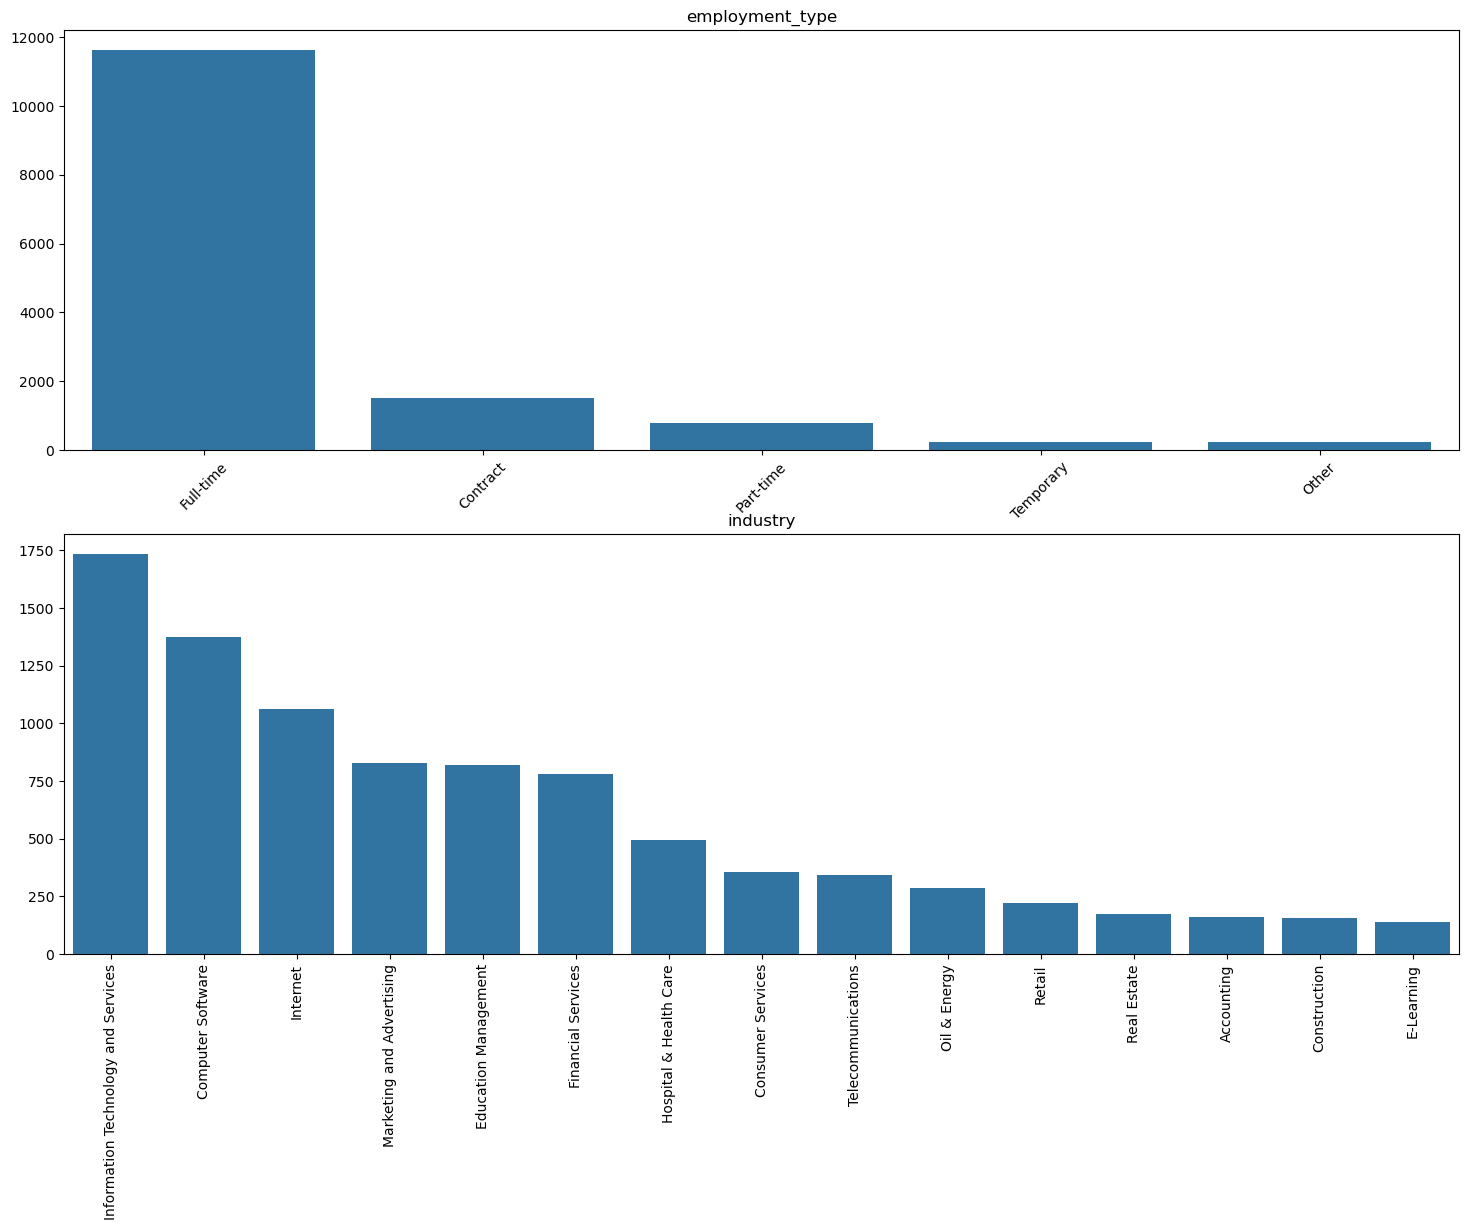

In [9]:
visualize = ['employment_type', 'industry']
fig, ax =plt.subplots(2,1, figsize=(18, 12))
j=0
for col in visualize:
    ax_g =ax[j]
    chart = sns.countplot(postings_new, x=col, ax=ax_g, order=postings_new[col].value_counts().iloc[:15].index)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90 if j == 1 else 45)
    ax_g.set_ylabel(None)
    ax_g.set_xlabel(None)
    ax_g.set_title(col, fontsize=12)
    j+=1
fig.show()

The most valuable data we have is in the form of text. We suppose that description and requirements are the most needed columns. Lets remove stop words, lemmatize remaining words and remove punctuation marks. We'll create vectors for the text in "description" and "requirements" columns. We'll also create two columns, "description_length" and "requirement_length" with the number of words in the description and requirement of each job posting.

In [10]:
nltk.download("wordnet")
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vetal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vetal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
postings_new['description']=postings_new['description'].astype(str)
postings_new['requirements']=postings_new['requirements'].astype(str)

In [14]:
response = postings_new['description']
# Stopword removal, converting uppercase into lower case, and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
description_without_stopwords = []
for i in range(0, len(response)):
    doc = re.sub('[^a-zA-Z]', ' ', response[i])
    doc = doc.lower()
    doc = doc.split()
    doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
    doc = ' '.join(doc)
    description_without_stopwords.append(doc)
postings_new['description_length'] = [len(key.split()) for key in description_without_stopwords]

Let's compare how the same description looks before and after processing:

In [15]:
response[0]

'Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff'

In [16]:
description_without_stopwords[0]

'food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various content management systemsresearching blog website provision food affiliate programassisting day day affiliate program support screening affiliate assisting affiliate inquiriessupporting pr amp event neededhelping office administrative work filing mailing preparing meetingsworking developer document bug suggest improvement sitesupporting marketing executive staff'

In [17]:
response_2 = postings_new['requirements']
# Stopword removal, converting uppercase into lower case, and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
requirement_without_stopwords = []
for i in range(0, len(response_2)):
    doc = re.sub('[^a-zA-Z]', ' ', response_2[i])
    doc = doc.lower()
    doc = doc.split()
    doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
    doc = ' '.join(doc)
    requirement_without_stopwords.append(doc)

Now our dataframe looks as follows, vectors are saved separately.

In [18]:
postings_new['requirements_length'] = [len(key.split()) for key in requirement_without_stopwords]
postings_new.head()

,job_id,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,industry,fraudulent,description_length,requirements_length
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,NaN,0,84,77
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Marketing and Advertising,0,206,132
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,0,30,123
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Computer Software,0,225,122
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Hospital & Health Care,0,131,66


In [19]:
# Import Tfidf vectorizer
vectorizer = TfidfVectorizer() 
description_vectors = vectorizer.fit_transform(description_without_stopwords)
# Print how many rows and columns of the TF-IDF matrix consists
print("n_samples: %d, n_features: %d" % description_vectors.shape)

n_samples: 17880, n_features: 54511
